In [37]:
import pandas as pd

In [34]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


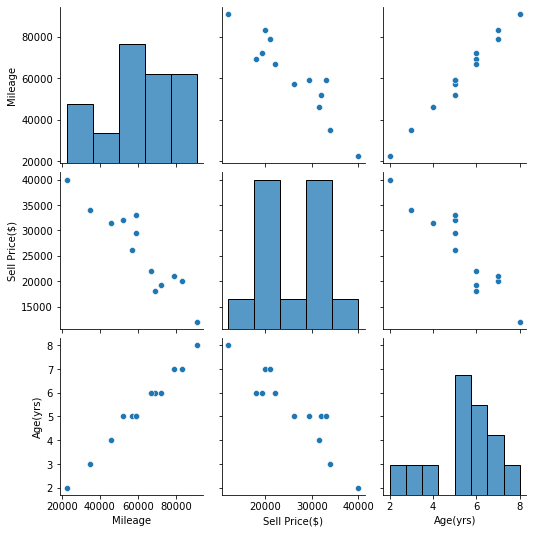

In [35]:
sns.pairplot(data=df)

In [44]:
x = df[['Car Model','Mileage','Age(yrs)']].values
x

array([['BMW X5', 69000, 6],
       ['BMW X5', 35000, 3],
       ['BMW X5', 57000, 5],
       ['BMW X5', 22500, 2],
       ['BMW X5', 46000, 4],
       ['Audi A5', 59000, 5],
       ['Audi A5', 52000, 5],
       ['Audi A5', 72000, 6],
       ['Audi A5', 91000, 8],
       ['Mercedez Benz C class', 67000, 6],
       ['Mercedez Benz C class', 83000, 7],
       ['Mercedez Benz C class', 79000, 7],
       ['Mercedez Benz C class', 59000, 5]], dtype=object)

In [40]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [48]:
x = ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, 69000, 6],
       [0.0, 1.0, 0.0, 35000, 3],
       [0.0, 1.0, 0.0, 57000, 5],
       [0.0, 1.0, 0.0, 22500, 2],
       [0.0, 1.0, 0.0, 46000, 4],
       [1.0, 0.0, 0.0, 59000, 5],
       [1.0, 0.0, 0.0, 52000, 5],
       [1.0, 0.0, 0.0, 72000, 6],
       [1.0, 0.0, 0.0, 91000, 8],
       [1.0, 0.0, 1.0, 67000, 6],
       [1.0, 0.0, 1.0, 83000, 7],
       [1.0, 0.0, 1.0, 79000, 7],
       [1.0, 0.0, 1.0, 59000, 5]], dtype=object)

In [49]:
x = x[:,1:]
x

array([[1.0, 0.0, 69000, 6],
       [1.0, 0.0, 35000, 3],
       [1.0, 0.0, 57000, 5],
       [1.0, 0.0, 22500, 2],
       [1.0, 0.0, 46000, 4],
       [0.0, 0.0, 59000, 5],
       [0.0, 0.0, 52000, 5],
       [0.0, 0.0, 72000, 6],
       [0.0, 0.0, 91000, 8],
       [0.0, 1.0, 67000, 6],
       [0.0, 1.0, 83000, 7],
       [0.0, 1.0, 79000, 7],
       [0.0, 1.0, 59000, 5]], dtype=object)

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [51]:
reg.fit(x,y)

LinearRegression()

In [52]:
reg.score(x,y)

0.9417050937281083

In [53]:
# Predict price of a mercedez benz that is 4 yr old with mileage 45000
reg.predict([[0,1,45000,4]])

array([36991.31721062])

In [54]:
# Predict price of a BMW X5 that is 7 yr old with mileage 86000
reg.predict([[1,0,86000,7]])

array([11080.74313219])